In [48]:
# Tasks to be done :
    
# Step - 1: Download the csv file and read it in a Pandas Dataframe. Handle missing values and treat outliers. Don’t forget to visualise the data.

# Step - 2: Train different Machine Learning models:
# Logistic Regression
# SVM with Linear Kernel
# SVM with RBF Kernel
# Decision Tree
# KNN

# Step - 3: Perform proper hyperparameter tuning for each model from Step - 2 😢
# Step - 4: Compare all the models and write your observations i.e. why is one model better than the other?
# Add this observation at the end of your jupyter notebook
# Hint: Try to visualise the data 😮

# Step - 5: Upload your Jupyter Notebook on Github or Google Drive and submit the link in the form mentioned below. 

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [50]:
# loading csv as variable name data

df=pd.read_csv('train.csv')
df.head()

,-48.3666687,49,1
0,-28.764718,32.895035,1
1,-57.652411,30.937698,1
2,-60.491484,59.372470,1
3,-39.366669,53.000000,1
4,-51.430453,71.764228,1


In [51]:
df.shape # checking the shape of the value.

(1036, 3)

In [52]:
df.describe(include='all') # Statistical details of the datframe

,-48.3666687,49,1
count,1036.000000,1036.000000,1036.000000
mean,-0.840071,7.150771,0.277027
std,74.697759,69.416254,0.447746
min,-134.736012,-134.645577,0.000000
25%,-62.253077,-43.174441,0.000000
50%,0.522257,14.847235,0.000000
75%,60.969410,57.000000,1.000000
max,133.602619,134.612405,1.000000


In [53]:
df.info() # Summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   -48.3666687  1036 non-null   float64
 1   49           1036 non-null   float64
 2   1            1036 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 24.4 KB


In [54]:
# handling missing values in the data frame.
df.isnull().sum() # no null values are present .

-48.3666687    0
49             0
1              0
dtype: int64

In [55]:
df.columns

Index(['-48.3666687', '49', '1'], dtype='object')

In [56]:
df.columns=['x1','x2','y']
df

,x1,x2,y
0,-28.764718,32.895035,1
1,-57.652411,30.937698,1
2,-60.491484,59.372470,1
3,-39.366669,53.000000,1
4,-51.430453,71.764228,1
...,...,...,...
1031,109.982521,92.555199,0
1032,90.633331,-82.000000,0
1033,93.732641,-99.824137,0
1034,76.703768,-79.187814,0


<AxesSubplot:xlabel='x1'>

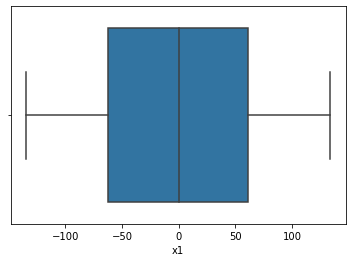

In [57]:
## Outliner dection 

sns.boxplot(df['x1'])

<AxesSubplot:xlabel='x2'>

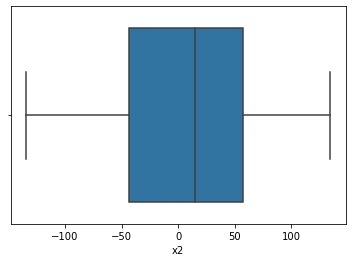

In [58]:
sns.boxplot(df.x2)

In [59]:
import numpy as np
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df['x1'])

Outliers: []


In [60]:
import numpy as np
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df['x2'])


# no outliers were found .

Outliers: []


In [61]:
df['y'].value_counts() # Unique values in the target variable

0    749
1    287
Name: y, dtype: int64

# Eda 

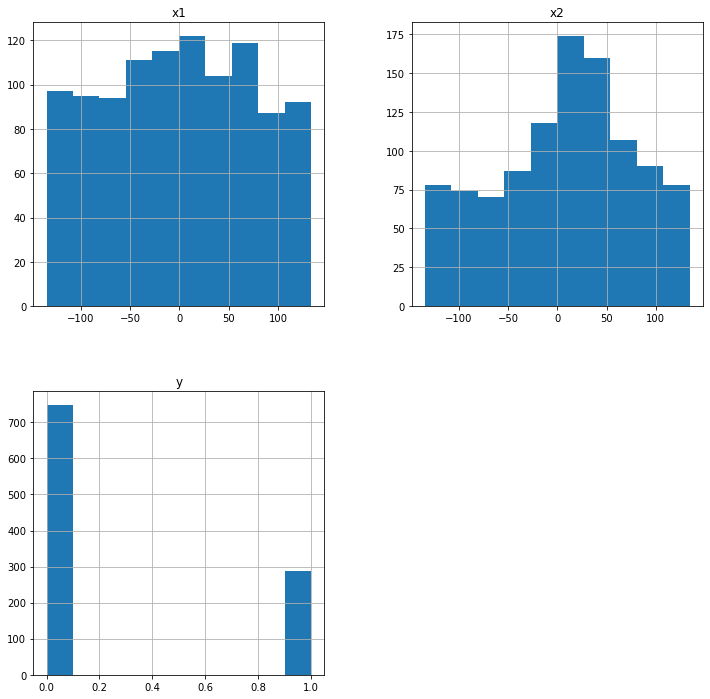

In [62]:
features = ['x1','x2','y']
df[features].hist(figsize=(12,12))
plt.show()

<AxesSubplot:xlabel='y', ylabel='Density'>

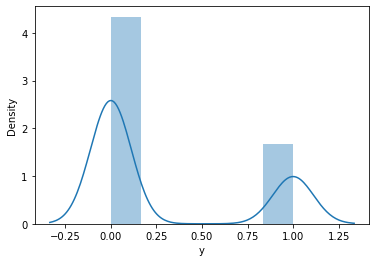

In [63]:
# Target Variable

sns.distplot(df.y)

In [64]:
# Correlation Matrix

corr_matrix = df.corr()
corr_matrix

,x1,x2,y
x1,1.000000,-0.002195,-0.004539
x2,-0.002195,1.000000,0.038554
y,-0.004539,0.038554,1.000000


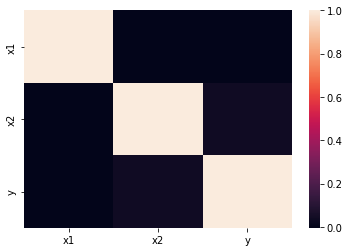

In [65]:
# Heatmap

sns.heatmap(corr_matrix)
plt.show()

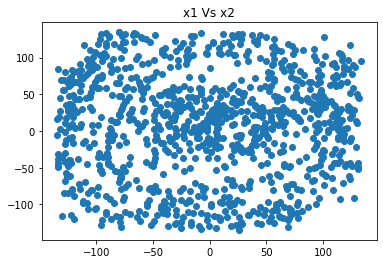

In [66]:
plt.scatter(df['x1'], df['x2']);
plt.title("x1 Vs x2")
plt.show()

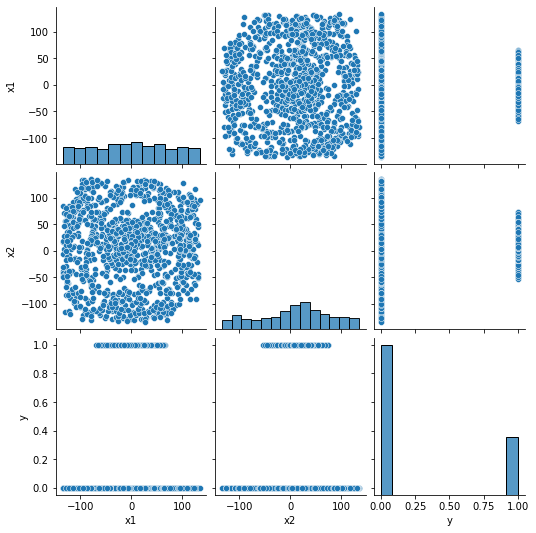

In [67]:
sns.pairplot(df)
plt.show()

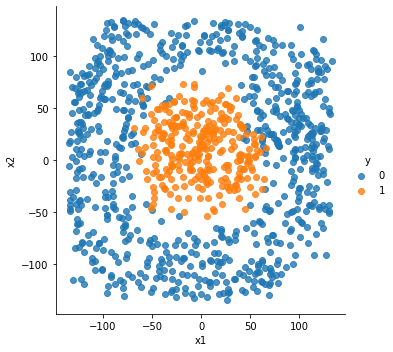

In [68]:
sns.lmplot('x1', 'x2', data = df ,hue='y',fit_reg=False);

# Model training

In [87]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd


# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Modelling Helpers :
from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.impute import SimpleImputer

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  



In [88]:
# Split the data into train and test

X = df.drop(['y'], axis=1)
Y = df['y']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=21)

In [89]:
# Standard Scaler:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
# Logistic regression:

from sklearn.linear_model import LogisticRegression

clr_lr = LogisticRegression()

clr_lr.fit(X_train,Y_train)

# Prediction on Test Dataset

Y_pred_lr =clr_lr.predict(X_test)

Y_pred_lr

# Model Evaluation

from sklearn import metrics

metrics.accuracy_score(Y_test, Y_pred_lr)

0.7258687258687259

In [93]:
# KNeighbors Classifier: 

from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()

clf_knn.fit(X_train , Y_train)

# Prediction on Test Dataset

Y_pred_Knn = clf_knn.predict(X_test)

Y_pred_Knn

# Model Evaluation

from sklearn import metrics

metrics.accuracy_score(Y_test, Y_pred_lr)



0.7258687258687259

In [94]:
# HyperParameter Tuning

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

tuned_parameters = [{'n_neighbors':[1,3,5,7,11,13,15],'p':[1,2,3,4,5]}]

clf = GridSearchCV(KNeighborsClassifier(),tuned_parameters,scoring='accuracy')

clf.fit(X_train,Y_train)

print("Best Parameters set found on the train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()
print(clf.score(X_test,Y_test))

Best Parameters set found on the train set:
{'n_neighbors': 11, 'p': 1}
KNeighborsClassifier(n_neighbors=11, p=1)

0.9806949806949807


**There was a huge change after the hyperparameter tuning in KNN Algorithm.**

Before Tuning : 0.72

After Tuning : 0.97

In [95]:
# Decision tree Classifier

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()

clf_dt.fit(X_train, Y_train)

# Prediction

Y_pred_dt = clf_dt.predict(X_test)
Y_pred_dt

# Evaluation of the model 

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf_dt.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf_dt.score(X_test, Y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.98


In [96]:
# Hyper Parameter Tuning 

from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(max_depth=3,min_samples_split=20).fit(X_train, Y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(DT_clf.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(DT_clf.score(X_test, Y_test)))

Accuracy of Decision Tree classifier on training set: 0.88
Accuracy of Decision Tree classifier on test set: 0.93


**A slight change in the accuracies after hyperparameter tuning**

- Before Tuning : 0.97

- After Tuning : 0.91

### Logistic Regression :

*No change in the accuracies of Logistic Regression Model even after hyperparamter tuning*

Before Tuning : 0.72

### KNN Classifier:

**There was a huge change after the hyperparameter tuning with in KNN Algorithm.**

- Before Tuning : 0.72

- After Tuning : 0.97
    
    ### Decision Tree Classifier :

**A slight change in the accuracies after hyperparameter tuning**

- Before Tuning : 0.97

- After Tuning : 0.91

# Decison tree is the best with its accuracy 


